# Advanced Methods in Data Analysis

# Ejercicio 5 - Grupo 8



## Integrantes
Laura Gutierrez   Código 201015209

Fernando Bautista Código 202027865

Fredi Baron       Código 202027522

Ingrid Hernández  Código 202028041

### 1. Estandarizar el dataset example_retail_sales dataset usando np.log

Antes de estandarizar la variable "Sales", cargamos los datos y convertimos la variable ds (meses) a tipo date.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

sales = pd.read_csv('example_retail_sales.csv')
sales['ds'] = pd.to_datetime(sales['ds'])
df = pd.DataFrame(sales)

In [2]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


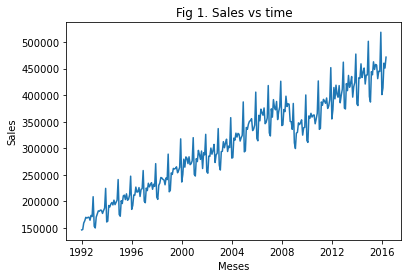

In [3]:
plt.plot(df['ds'],df['y'])
plt.xlabel('Meses')
plt.ylabel('Sales') 
plt.title('Fig 1. Sales vs time')
plt.show()

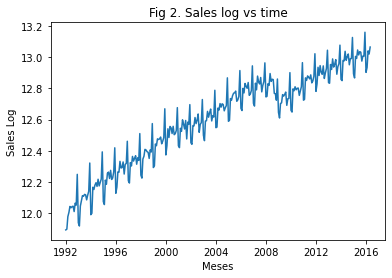

In [4]:
import numpy as np
df['y'] = np.log(df['y'])
plt.plot(df['ds'],df['y'])
plt.xlabel('Meses')
plt.ylabel('Sales Log') 
plt.title('Fig 2. Sales log vs time')
plt.show()

### 2. Usando prophet pronostique los siguientes 6 meses del logaritmo de las ventas

Primero se necesita instalar Prophet in Anaconda:
1. Instalar Ephem: conda install -c anaconda ephem
2. Instalar Pystan: conda install -c conda-forge pystan
3. Instalar Fbprophet: conda install -c conda-forge fbprophet

In [6]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
#Creación del df de los siguientes 6 meses
future = m.make_future_dataframe(periods=6, freq='M')
future['ds'] = future['ds'].to_numpy().astype('datetime64[M]')
future.tail()

,ds
294,2016-06-01
295,2016-07-01
296,2016-08-01
297,2016-09-01
298,2016-10-01


Al crear el df de las fechas futuras identificamos que se creaban con el último día del mes y que esto hacía diferencia al pronosticar el valor de la variable de interés por lo cual se hizo el cambio al primer día del mes

In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-01,13.055276,13.034317,13.075470
295,2016-07-01,13.056215,13.035196,13.077167
296,2016-08-01,13.076794,13.056321,13.097547
297,2016-09-01,13.009803,12.989479,13.030817
298,2016-10-01,13.048847,13.029132,13.069837


#### Visualización del pronóstico

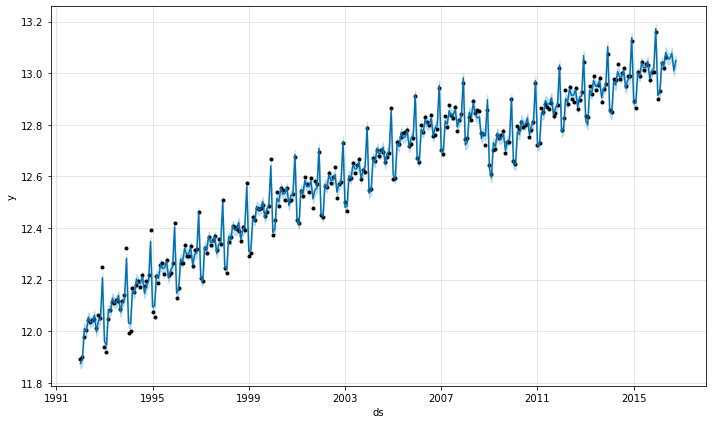

In [19]:
fig1 = m.plot(forecast)

#### Visualización de los componentes del pronóstico

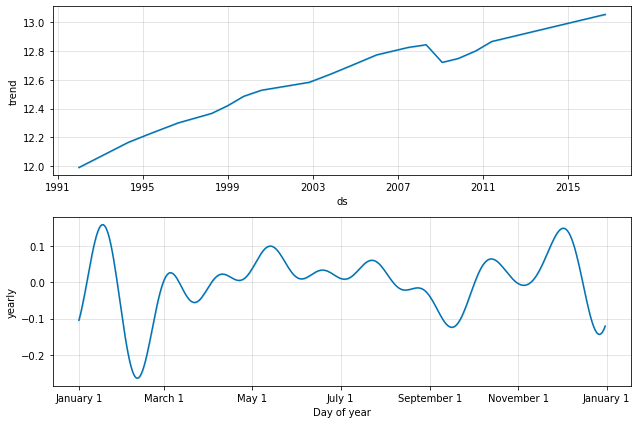

In [20]:
m.plot_components(forecast);

El componente de tendencia muestra una fuerte caída en el año 2009 que se recupera en el año 2011 ya que mantiene la tendencia de crecimiento. Por otro lado, el componente estacional muestra que en los últimos y los primeros meses del año hay un incremento significativo del log de las ventas

### 3. Pronostique los siguientes 6 meses de las ventas

Para hacer este pronóstico volvemos a usar Prophet tomando la variable origina

In [25]:
sales = pd.read_csv('example_retail_sales.csv')
df2 = pd.DataFrame(sales)
df2['ds'] = pd.to_datetime(df2['ds'])
df2.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [26]:
#Creación del df de los siguientes 6 meses
future2 = m.make_future_dataframe(periods=6, freq='M')
future2['ds'] = future2['ds'].to_numpy().astype('datetime64[M]')
future2.tail()

,ds
294,2016-06-01
295,2016-07-01
296,2016-08-01
297,2016-09-01
298,2016-10-01


In [27]:
forecast2 = n.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-01,467140.760434,455845.703168,476976.262762
295,2016-07-01,468202.858454,458144.042466,478864.423535
296,2016-08-01,475842.593198,465746.304979,486100.997871
297,2016-09-01,456351.180618,445908.433731,467026.350216
298,2016-10-01,467599.012516,456912.019684,478824.389130


#### Visualización del pronóstico

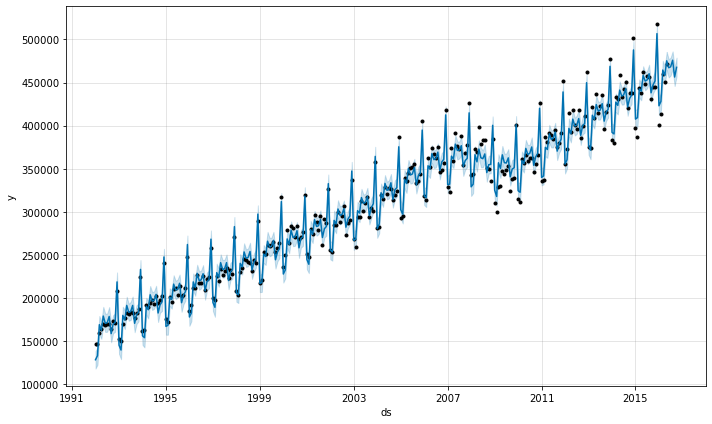

In [28]:
fig2 = n.plot(forecast2)

#### Visualización de los componentes del pronóstico

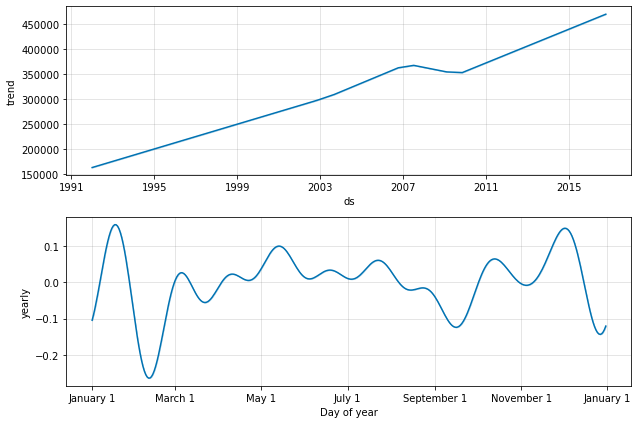

In [29]:
m.plot_components(forecast2);

De la misma forma que para el logaritmo de las ventas, el componente de tendencia muestra una fuerte caída de las ventas en el año 2009 que se recupera en el año 2011 ya que mantiene la tendencia de crecimiento. Por otro lado, el componente estacional muestra que diciembre, enero, febrero y octubre hay un movimiento significativo de las ventas

A diferencia de la gráfica de tendencia del ejercicio con el logaritmo de las ventas, la gráfica del componente de tendencia de las ventas muestra la caída un poco más suave

### Conclusión

Se puede observar que la serie de ventas a pesar de presentar una caída fuerte en el año 2009 mantiene una tendencia de crecimiento. Además se observa estacionalidad evidenciada en el incremento abrupto de las ventas en los meses de diciembre seguido de una caída para el mes de enero y febrero, también se observa estacionalidad en el mes de octubre donde pareciera hacer una caída significativa en cada año 